# Instance Segmentation on MLBFR

This notebook contains instance segmentation task on the MLBFR Dataset using the current state of the art model, YOLOv8

**Sourced from [Ultralytics](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/)

### Check Runtime for GPU acceleration

In [ ]:
!nvidia-smi

Wed Feb 22 20:53:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    19W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Installing the YOLOv8 dependencies

In [5]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.6/78.2 GB disk)


## Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import DataSet & Weights to Runtime

In [ ]:
#Dataset Import
!mkdir datasets
!cp -RT /content/drive/MyDrive/RESEARCH/DATASET_YOLOv8 /content/datasets/

#Weights Import
!cp -RT /content/drive/MyDrive/RESEARCH/CHECKPOINTS/yolov8/Exp_2/ /content/

## Load Libraries


In [6]:
from ultralytics import YOLO
from IPython.display import display, Image

## Training Results

---



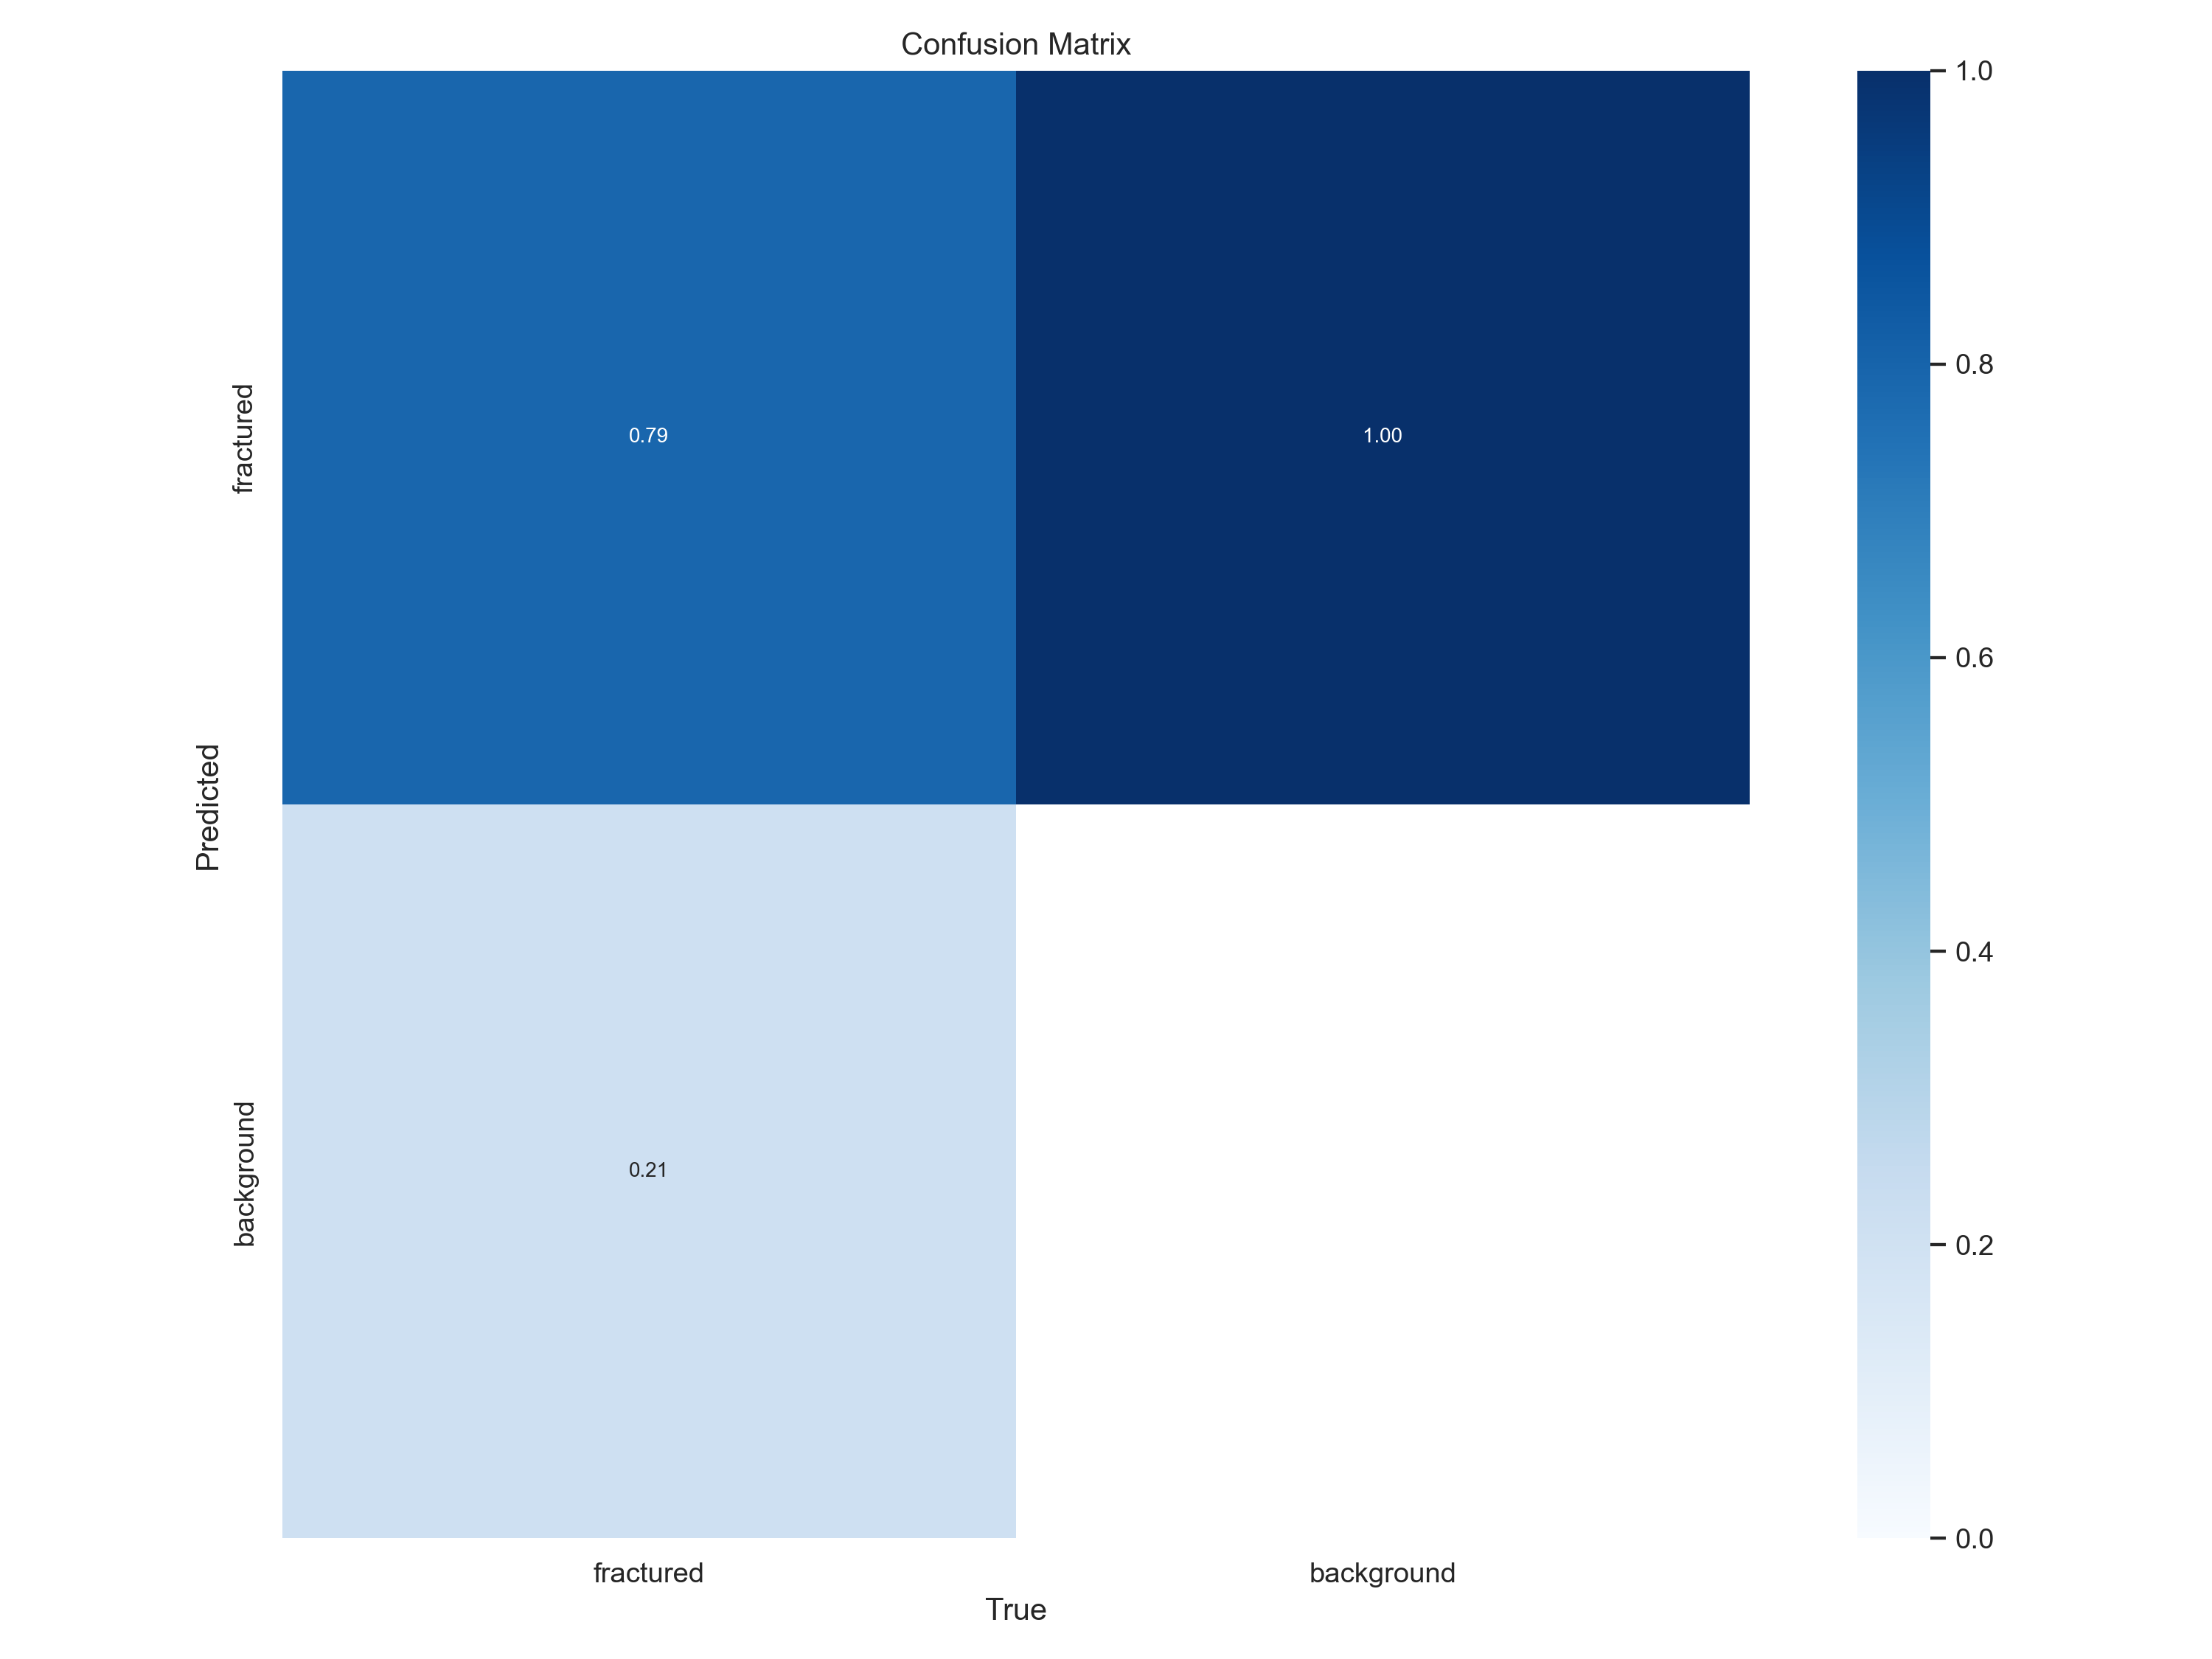

In [7]:
#Confusion Matrix
Image(filename="/content/confusion_matrix.png", width=600)

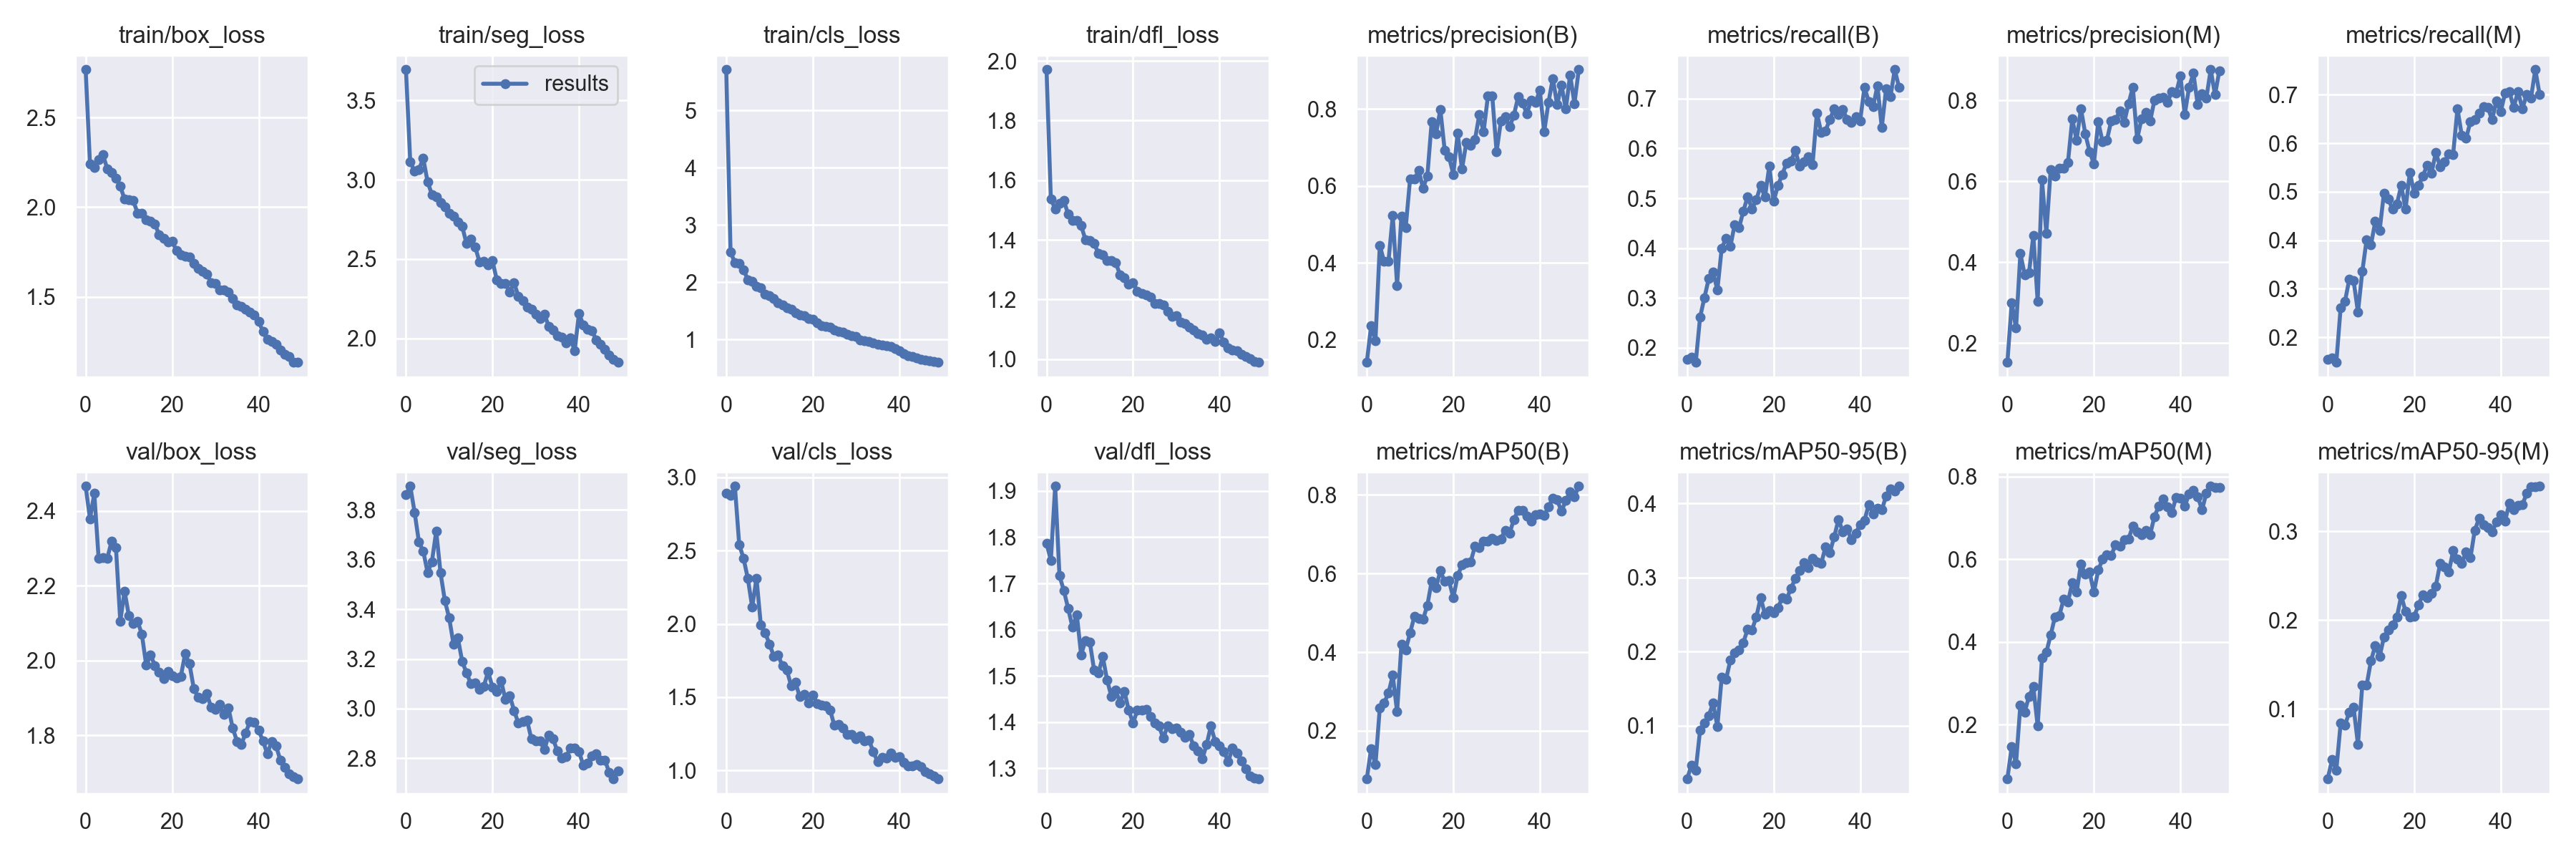

In [8]:
#Metrics
Image(filename="/content/results.png", width=600)

## Infer on MLBFR

---



In [ ]:
!yolo task=segment mode=predict model=/content/best.pt data=/content/datasets/test/images conf=0.25 source=datasets/test/images/ save=true

Ultralytics YOLOv8.0.28 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/118 /content/datasets/test/images/IMG0000025_jpg.rf.bca848d5c13a2d63d9c0e183c2772585.jpg: 640x640 1 fractured, 21.8ms
image 2/118 /content/datasets/test/images/IMG0000471_jpg.rf.faf3e524aba8bce7b71648d0c355c4b9.jpg: 640x640 21.8ms
image 3/118 /content/datasets/test/images/IMG0000801_jpg.rf.95948134405fb8632c8c0c217fcc66b2.jpg: 640x640 1 fractured, 21.8ms
image 4/118 /content/datasets/test/images/IMG0001008_jpg.rf.74d6b0446fda1f1523df20218da196ee.jpg: 640x640 1 fractured, 21.8ms
image 5/118 /content/datasets/test/images/IMG0001025_jpg.rf.19638123e166f8da0536ea0e02a5e6ea.jpg: 640x640 1 fractured, 21.7ms
image 6/118 /content/datasets/test/images/IMG0001026_jpg.rf.13dd270b5ad145d93d813cf71378a643.jpg: 640x640 1 fractured, 21.8ms
image 7/118 /content/datasets/test/images/IMG0001351_jpg.rf.4ad0ee89fa15b8477126fd

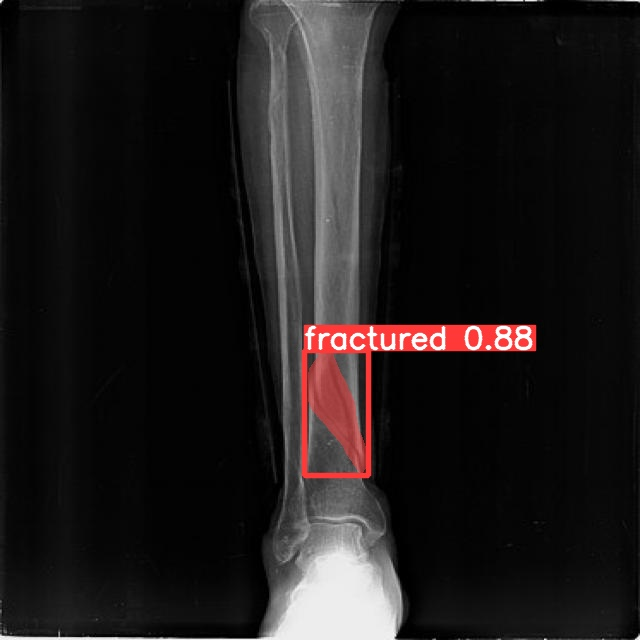

In [ ]:
import glob,random
from IPython.display import Image

imageName=random.choice(glob.glob('/content/runs/segment/predict/*.jpg'))
Image(filename=imageName) 